In [1]:
# Necessary library imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [3]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.257608,0.658155,2.264646,3.058385,0.000037,1.517203,0.137140,0.050491,43.148907,0.181501,...,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137,43.384964,9.512937,6.125956
std,0.750485,1.524138,1.769305,0.454794,0.000195,0.571481,0.019310,0.049037,2.002965,0.385446,...,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701,2.719731,12.094056,7.806248
min,1.934498,0.000000,0.000000,1.579212,0.000000,0.000000,0.092453,0.000000,35.555768,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.677807,0.000000,0.000000
25%,3.775100,0.000000,0.000000,2.754021,0.000000,1.235023,0.116509,0.000000,40.606701,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.815953,0.000000,0.000000
50%,4.167775,0.000000,2.899547,3.058385,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.436808,0.084588,0.000000
75%,4.597146,0.000000,3.529430,3.379956,0.000000,2.120673,0.146348,0.098837,44.311378,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,44.519593,24.477135,16.320634
max,6.601155,5.544051,5.887169,4.496211,0.001064,2.778376,0.210689,0.195975,53.284378,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.504483,36.587507,16.911504


FROM EDA we know that our data is an imbalanced dataset with only 9.3 % values being the churn category and rest being the non-churn category. Since this imbalance in data will cost us a lot bias and probably underfitting. We may need to focus on dealing with imbalanced dataset. There are two interesting ways to deal with imbalanced data : 

1. Undersampling : Near Miss
2. Oversampling : SMOTETOMEK


Undersampling Approach : Issue of Data Loss. 
In our case we do not have much data at our hands its only near to 14 thousand rows. Hence we may avoid this approach but as its always a good practice to test out everything in Machine Learning as there is no hardcoded science behind the application of the modelling techniques. 

In [4]:
X = df.drop(["id","churn"], axis =1)
Y = df["churn"]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(14606, 34)
(14606,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20, stratify = Y)

In [6]:
y_train.value_counts()

0    10549
1     1135
Name: churn, dtype: int64

In [7]:
y_test.value_counts()

0    2638
1     284
Name: churn, dtype: int64

In [8]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [9]:
y_under.value_counts()

0    1135
1    1135
Name: churn, dtype: int64

OverSampling : Issue of Overfitting

Oversampling has various methods to over sample the data. First is to repeat the datapoints in minority, second is to generate artificial datapoints, third is to assign class weights. XG boost and other boosting algorithm works on this technique of assigning weights to the data and hence they automatically handle the imbalance of the dataset. 

Only problem with over sampling is that it leads to overfitting of the data. Hence we need to be very very clear in our approach while validating the ML models to check for oversampling. 

In [10]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_over, y_over = os.fit_resample(X_train, y_train)

In [11]:
y_over.value_counts()

0    10549
1    10549
Name: churn, dtype: int64

SMOTETomek is both for undersampling and oversampling together applied. 

In [41]:
from imblearn.combine import SMOTETomek
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek()

X_over_smote, y_over_smote = os_us.fit_resample(X_train, y_train)

In [46]:
y_over_smote.value_counts()

0    10423
1    10423
Name: churn, dtype: int64

As of now in over sampling and under sampling,we have not played with the parameter of the ratio. We can define the ratio and then check our models for the performance on the data. In our case we have taken a default ratio of 1. 

There are multiple ways to handle imbalanced data and many sampling techniques with Balanced algorithms like Balanced Random Forest and others. 

Please go over the link here : https://imbalanced-learn.org/stable/introduction.html

This link contains all one needs to handle imbalanced data. 

## Algorithm 1 : Logistic Regression 

Lets go for the basic algorithm first. There are three presumptions for logistic regression to be applied, 

1. The data should be linearly separable 
2. No multicolinearity in data 
3. Binary and dichotomous classification 
4. Large sample 
Lets go for the basic algorithm first. There are three presumptions for logistic regression to be applied,


Do check this Kaggle notebook : https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook



https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/#:~:text=MinMax%20Scaler%20shrinks%20the%20data,shape%20of%20the%20original%20distribution.



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### For Undersampled dataset

Min Max Scaler


https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/#:~:text=MinMax%20Scaler%20shrinks%20the%20data,shape%20of%20the%20original%20distribution.

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_under = scaler.fit_transform(X_under)

X_test = scaler.transform(X_test)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_under, y_under)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
negative = 0
positive = 0
for pred in y_pred_test:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 1648
Churn cases: 1274


Accuracy Score does not work well in case of imbalanced data as model is always biased and even if it is not predicting the minority well. It will give the accuracy near to null accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5859


As our accuracy score is not very impressive lets play with our model parameters to achieve the best model for our under sampled data. For this purpose we will make a parameter grid and use hyper parameter tuning to train our model. 

We can see more on hyper parameter tuning here : https://www.youtube.com/watch?v=355u2bDqB7c

In penalty we are looking for an appropriate regularization whether its l1, or l2 or elastic net (both l1 and l2). 

Paramter C decides the intensity of regularisation. Lower the parameter lesser the model is regularised. More the parameter more the model is regularised. 

Usually we should do a random search CV and then go for grid search but we do not have a very computationally intensive operation here and hence can go for grid search CV. 

In [ ]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(solver='saga', random_state=0)

parameters = [{'penalty':['l1','l2','elasticnet']}, 
              {'C':[0.01,0.1,1, 10, 100, ]},
              {'solver':['saga','liblinear']}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_under, y_under)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0, solver='saga'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'C': [0.01, 0.1, 1, 10, 100]},
                         {'solver': ['saga', 'liblinear']}],
             scoring='accuracy')

Now as we can see that 5/50 predictions failed as liblinear will not work on elastic net. Finally we have achieved a stable logistic regression model with an accuracy score as a metric. 

estimator=LogisticRegression(random_state=0, solver='saga')

In [ ]:
#examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.5987


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='saga')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV accuracy score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV accuracy score on test set: 0.5893


Now we are getting a similar score that we were getting with our base model in logistic regression. This means that our model classification is not able to fulfil some conditions for logistic regression to be effective. 

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
y_test.value_counts()

0    2638
1     284
Name: churn, dtype: int64

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1547 1091]
 [ 109  175]]

True Positives(TP) =  175

True Negatives(TN) =  1547

False Positives(FP) =  109

False Negatives(FN) =  1091


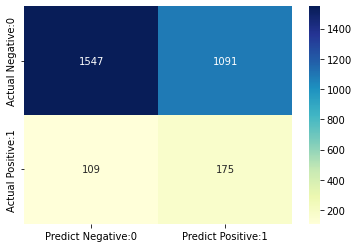

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5893


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6162


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.1382


In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
print("F1 score {}".format(f1_score))

F1 score 0.22580645161290325


So the f1 score is low as the recall value is very low and precision value is also not very impressive. Hence may be logistics regression is not one of the models we should be relying upon in this case. 

We can understand from the above metrics that our precision and recall values have improved than before after applying sampling techniques. The score looks good with undersampled data than with raw data which was imbalanced. 

### Oversampled Data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_under = scaler.fit_transform(X_over_smote)

X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_over_smote, y_over_smote)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
negative = 0
positive = 0
for pred in y_pred_test:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2917
Churn cases: 5


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9018


Our accuracy is near to the null accuracy of our dataset which means that our model is overfitting the data which is a classic problem. 

In [64]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(solver='saga', random_state=0)

parameters = [{'penalty':['l1','l2','elasticnet']}, 
              {'C':[0.01,0.1,1, 10, 100]},
              {'solver':['saga','liblinear']}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_over_smote, y_over_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0, solver='saga'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'C': [0.01, 0.1, 1, 10, 100]},
                         {'solver': ['saga', 'liblinear']}],
             scoring='accuracy')

In [ ]:
#examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8082


Parameters that give the best results : 

 {'solver': 'liblinear'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV accuracy score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV accuracy score on test set: 0.9018


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred = grid_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Confusion matrix

 [[2634    4]
 [ 283    1]]

True Positives(TP) =  1

True Negatives(TN) =  2634

False Positives(FP) =  283

False Negatives(FN) =  4


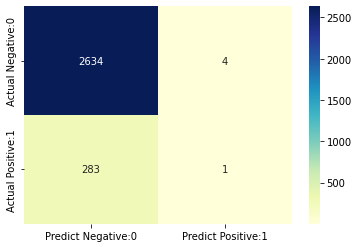

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

f1_score = 2*(precision*recall)/(precision+recall)
print("F1 score {}".format(f1_score))

Classification accuracy : 0.9018
Precision : 0.0035
Recall or Sensitivity : 0.2000
F1 score 0.006920415224913495


This is a classic case of overfitting the data which is one of the major problems with over sampling. 

We will use learning curve for our model checking purpose: 
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

Conclusion : Logistic Regression is not the best model for our data when undersampled and over sampled. 

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='liblinear', random_state=0), X_over_smote, y_over_smote, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

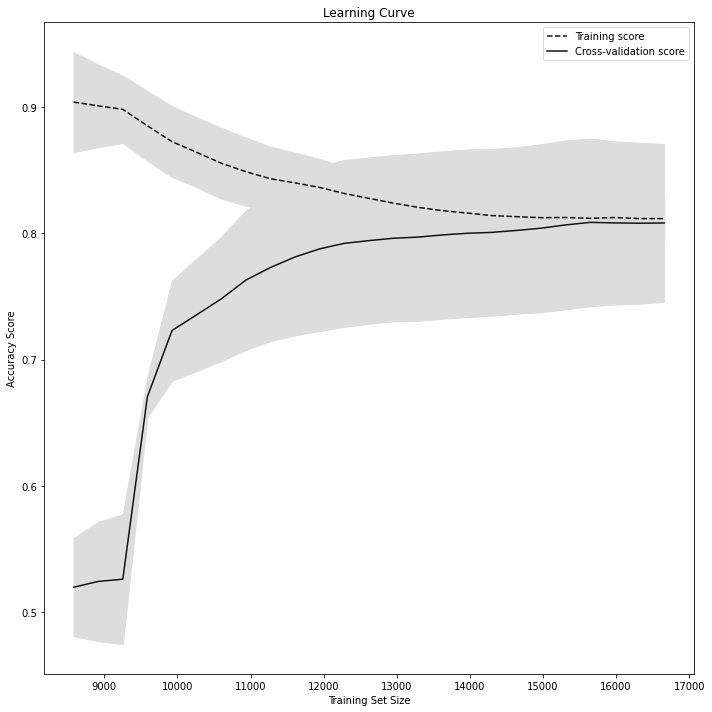

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Hence from the above plot we can realise that we overfit the data. 

## ALGORITHM 2 : Random Forest 

Bagging(Bootstrap Aggregation) ensemble technioque which is considered to perform really well on most of the dataset. It is one of the most used algorithm in industry.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [4]:
df.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.0,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,...,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0,0,0,1,0,0,0,44.555962,0.088421,0.000000


In [83]:
from sklearn.model_selection import train_test_split
X = df.drop(["id","churn"], axis = 1)
Y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20)

In [19]:
columns_rfc = X_train.columns

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

The standard score of a sample x is calculated as:

z = (x - u) / s

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [9]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9196


In [10]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2905
Churn cases: 17


In [11]:
y_test.value_counts()

0    2672
1     250
Name: churn, dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2671    1]
 [ 234   16]]

True Positives(TP) =  16

True Negatives(TN) =  2671

False Positives(FP) =  234

False Negatives(FN) =  1


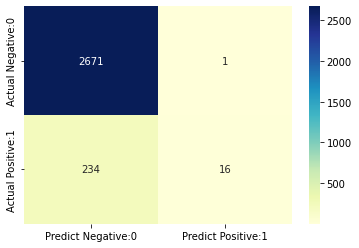

In [13]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [14]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.9196
Precision : 0.0640


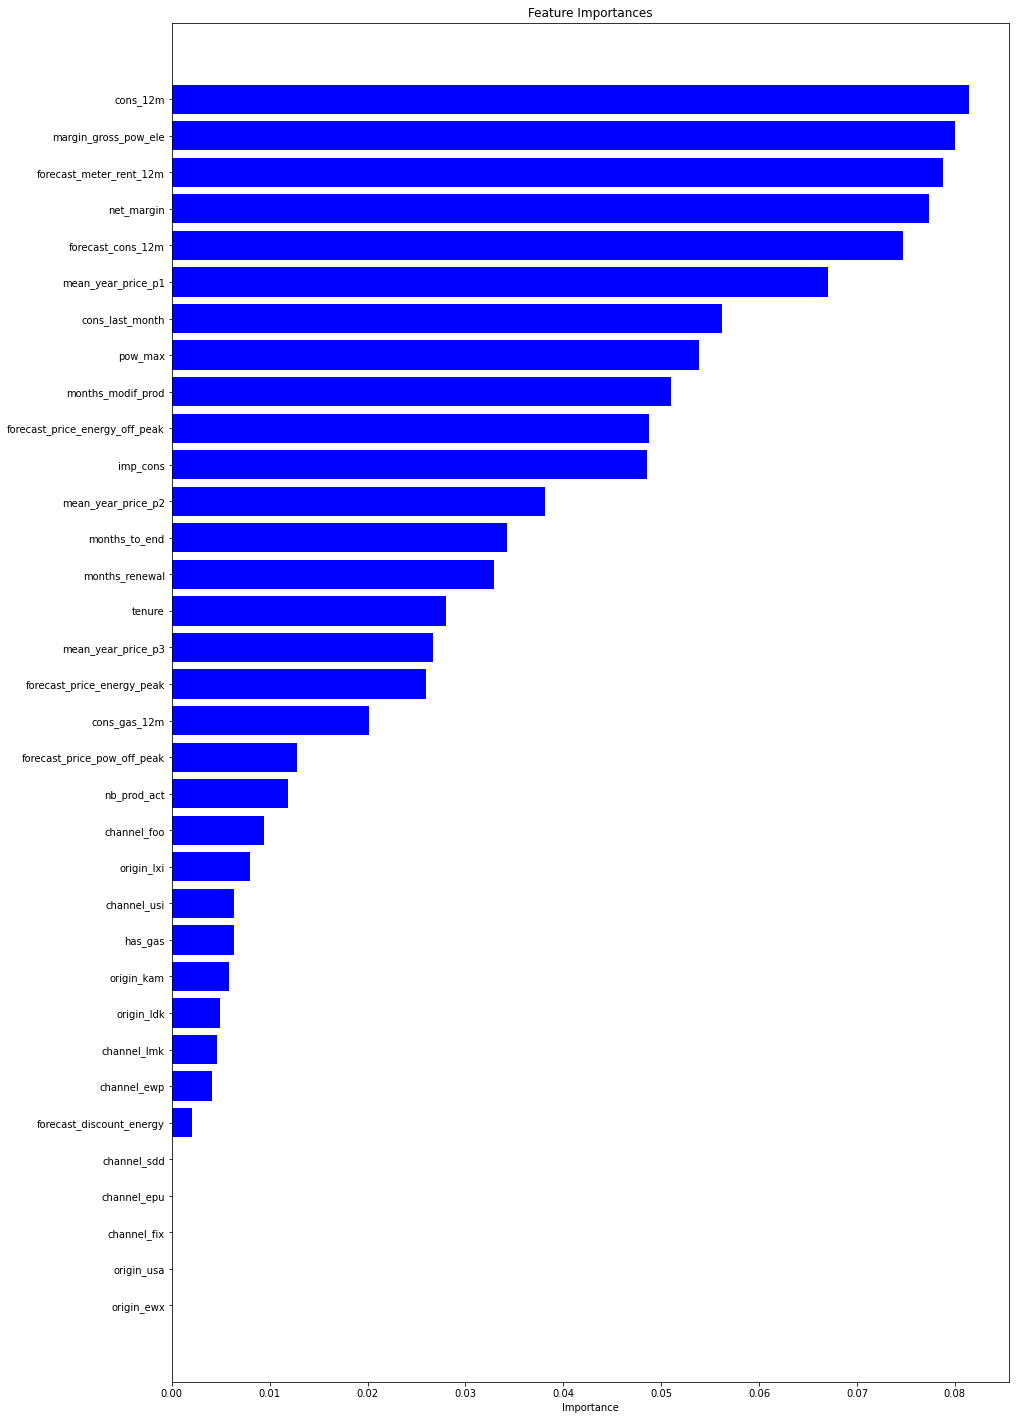

In [20]:
feature_importances = pd.DataFrame({
    'features': columns_rfc,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features']) 
plt.xlabel('Importance')
plt.show()

Using Random Forest as well with 500 estimators we are not obtaining any good precision. This may be owing to underfitting to the biased dataset. We may try few methods to address this issue : 

1. Class weights 
2. Oversampling and Undersampling Data 
3. Train with fewer parameter : PCA or top 10 preferences 
4. Combination of these things 

Lets try providing class weights to our under represented class. As we know th ration of churn to non churn is 1:9 lets reverse the class weights to see whether it changes our results. 

In [22]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0, class_weight={0:1,1:9})
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [23]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9199


In [24]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2904
Churn cases: 18


Lets try some radical weight assignment 

In [25]:
y_train.value_counts()

0    10515
1     1169
Name: churn, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0, class_weight={0:1,1:1000})
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [27]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9192


In [28]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2908
Churn cases: 14


Hence, class weights are not prooving to be effective. 

using undersampled data 

In [47]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=500,random_state=0)
# fit the model
rfc.fit(X_under, y_under)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [48]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6444


In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1699  939]
 [ 100  184]]

True Positives(TP) =  184

True Negatives(TN) =  1699

False Positives(FP) =  100

False Negatives(FN) =  939


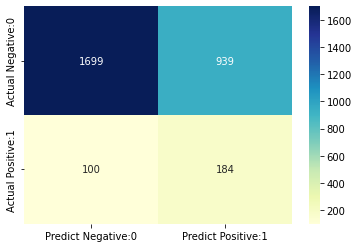

In [50]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP) 


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.6444
Precision : 0.6479


Lets do some hyperparameter tuning with this model 

In [52]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 "criterion":['gini', 'entropy', 'log_loss']}

We are using randomised search in order to ensure a faster convergence on hyperparameters

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [57]:
# execute search
result = rf_random.fit(X_under, y_under)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/pa

Best Score: 0.6255489621848055
Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'entropy', 'bootstrap': True}


Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'entropy', 'bootstrap': True} 

In [58]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=800,random_state=0)
# fit the model
rfc.fit(X_under, y_under)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [59]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6451


With over sampled data 

In [60]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=800,random_state=0)
# fit the model
rfc.fit(X_over_smote, y_over_smote)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [62]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.9008


In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2598   40]
 [ 250   34]]

True Positives(TP) =  34

True Negatives(TN) =  2598

False Positives(FP) =  250

False Negatives(FN) =  40


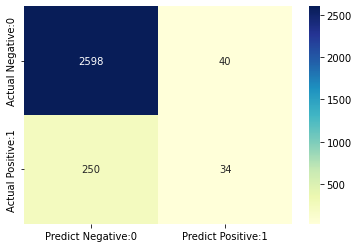

In [64]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [65]:
y_test.value_counts()

0    2638
1     284
Name: churn, dtype: int64

In [66]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP) 


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.9008
Precision : 0.1197


Now with undersampled data the perfomrance is slightly better than with the oversampled data. Lets do this thing that we make a test train split to the ratio of 10% of the total data and see how the perfomrance with under sampled data remains. 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.10, stratify = Y)

In [68]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [69]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=800,random_state=0)
# fit the model
rfc.fit(X_under, y_under)
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [70]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.6489


So there is just a slight increase in accuracy levels with thi split as well. 

Using Balanced RandomForestClassifier

In [77]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=800, random_state=0)
brf.fit(X_train, y_train) 
y_pred = brf.predict(X_test)

In [78]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.6537


In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1728  910]
 [ 102  182]]

True Positives(TP) =  182

True Negatives(TN) =  1728

False Positives(FP) =  102

False Negatives(FN) =  910


In [80]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP) 


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.6537
Precision : 0.6408


Balanced Random Forest give us similar results as wel will get for under sampled data with Random Forest Classifier. 

Lets try PCA with top 10 components and use random forest. We will see how the random forest will yield results. 

https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a

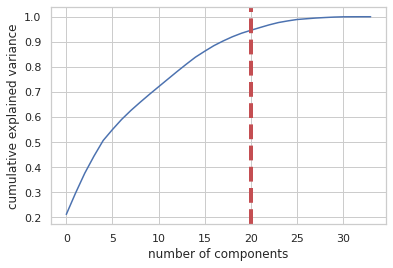

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.212287,0.212287
1,0.296972,0.084685
2,0.376378,0.079405
3,0.444618,0.068241
4,0.506905,0.062287
5,0.550239,0.043334
6,0.590824,0.040585
7,0.626408,0.035585
8,0.658957,0.032549
9,0.690328,0.031371


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=34)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

We can have a cut off at 21 as our 95% variance is captured with 21 components. 

In [113]:
pca = PCA(n_components=21)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

In [114]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

1.0

In [115]:
y_pred = rfc.predict(X_test_scaled_pca)

In [116]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.9165


In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2667    5]
 [ 239   11]]

True Positives(TP) =  11

True Negatives(TN) =  2667

False Positives(FP) =  239

False Negatives(FN) =  5


In [118]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP) 


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.9165
Precision : 0.0440


Lets use PCA with undersampled data 

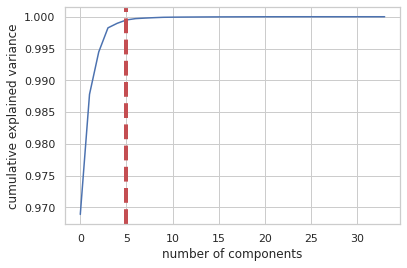

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.968889,9.688893e-01
1,0.987796,1.890627e-02
2,0.994458,6.662353e-03
3,0.998250,3.791901e-03
4,0.998967,7.168083e-04
5,0.999495,5.279391e-04
6,0.999707,2.125535e-04
7,0.999789,8.145913e-05
8,0.999855,6.686886e-05
9,0.999912,5.675998e-05


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=34)
pca_test.fit(X_under)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [121]:
pca = PCA(n_components=5)
pca.fit(X_under)
X_train_scaled_pca = pca.transform(X_under)
X_test_scaled_pca = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [123]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_under)
display(rfc.score(X_train_scaled_pca, y_under))

1.0

In [124]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.9165


In [125]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2667    5]
 [ 239   11]]

True Positives(TP) =  11

True Negatives(TN) =  2667

False Positives(FP) =  239

False Negatives(FN) =  5


In [126]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP) 


print('Precision : {0:0.4f}'.format(precision))

Classification accuracy : 0.9165
Precision : 0.0440


## XG BOOST CLASSIFIER

https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.9028062970568104


In [15]:
y_pred = xgb_classifier.predict(X_test)
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2922
Churn cases: 0


In [16]:
y_test.value_counts()

0    2638
1     284
Name: churn, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2638    0]
 [ 284    0]]

True Positives(TP) =  0

True Negatives(TN) =  2638

False Positives(FP) =  284

False Negatives(FN) =  0


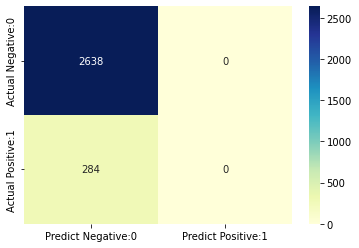

In [18]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9028


In [20]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0000


https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

undersampled data 

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_under,y_under)
predictions = xgb_classifier.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.6451060917180014


In [22]:
y_pred = xgb_classifier.predict(X_test)
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 1843
Churn cases: 1079


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[1722  916]
 [ 121  163]]

True Positives(TP) =  163

True Negatives(TN) =  1722

False Positives(FP) =  121

False Negatives(FN) =  916


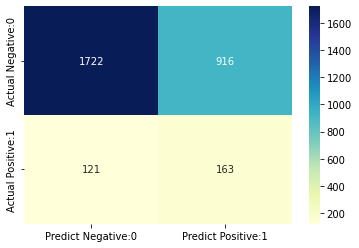

In [24]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6451


In [28]:
# print precision score
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5739


In [29]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.1511


In [30]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6134


In [31]:
f1_score = 2*(precision*recall)/(precision+recall)

print("The F1 score is: {}".format(f1_score))

The F1 score is: 0.2391782831988261


Hyperparameter Tuning : https://towardsdatascience.com/binary-classification-xgboost-hyperparameter-tuning-scenarios-by-non-exhaustive-grid-search-and-c261f4ce098d

In [33]:
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_under , y_under)

XGBClassifier(eval_metric='auc', grow_policy='lossguide', tree_method='hist',
              use_label_encoder=False)

In [34]:
predictions = xgbc0.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.6427104722792608


In [49]:
#setting grid of selected parameters for iteration
param_grid = {'gamma': [0.1,0.5,1.0,1.5],
              'learning_rate': [0.1, 0.5, 0.9],
              'max_depth': [5,6,7],
              'n_estimators': [50,100,150],
              'reg_alpha': [0.1,0.5,1.0,1.5],
              'reg_lambda': [0.1,0.5,1.0,1.5]}

In [50]:
from sklearn.model_selection import GridSearchCV
xgbc = xgb.XGBClassifier()
grid = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)

In [51]:
grid.fit(X_under,y_under)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


KeyboardInterrupt: ignored

Grid search is consuming more time, so lets go for randomised search CV 

In [53]:
from sklearn.model_selection import RandomizedSearchCV
xgbc = xgb.XGBClassifier()
random = RandomizedSearchCV(estimator=xgbc, param_distributions=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)

In [54]:
random.fit(X_under,y_under)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0.1, 0.5, 1.0, 1.5],
                                        'learning_rate': [0.1, 0.5, 0.9],
                                        'max_depth': [5, 6, 7],
                                        'n_estimators': [50, 100, 150],
                                        'reg_alpha': [0.1, 0.5, 1.0, 1.5],
                                        'reg_lambda': [0.1, 0.5, 1.0, 1.5]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [55]:
# summarize result
print('Best Score: %s' % random.best_score_)
print('Best Hyperparameters: %s' % random.best_params_)

Best Score: 0.6149791831209709
Best Hyperparameters: {'reg_lambda': 0.5, 'reg_alpha': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1.5}


In [56]:
y_pred = random.predict(X_test)

In [57]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

Accuracy of Model:: 0.6399726214921286


over sampling 

In [42]:
xgbc1 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc1.fit(X_over_smote, y_over_smote)

XGBClassifier(eval_metric='auc', grow_policy='lossguide', tree_method='hist',
              use_label_encoder=False)

In [44]:
predictions = xgbc1.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.8675564681724846


In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2501  137]
 [ 250   34]]

True Positives(TP) =  34

True Negatives(TN) =  2501

False Positives(FP) =  250

False Negatives(FN) =  137


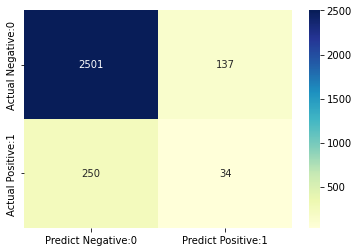

In [46]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [48]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

# print precision score
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.1197
